In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers

2024-01-20 02:06:51.622392: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 29s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
roses = list(data_dir.glob('roses/*'))

In [7]:
roses[:10]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg')]

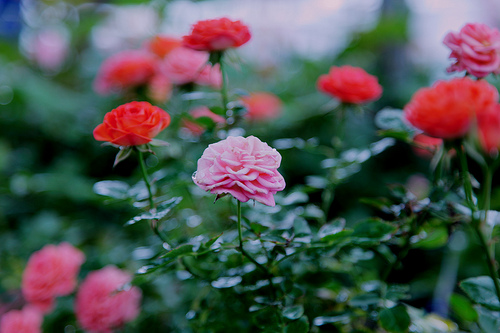

In [8]:
PIL.Image.open(str(roses[1]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [10]:
flowers_images_labels = {
    'roses': 0,
    'daisy': 1,
    'dandelion':2,
    'sunflowers':3,
    'tulips': 4,
}

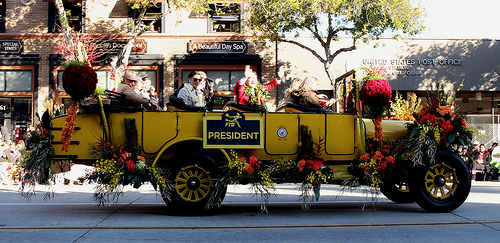

In [11]:
PIL.Image.open(str(roses[0]))

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

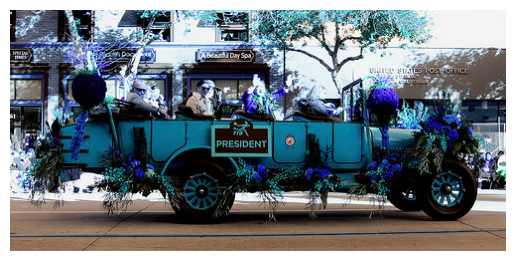

In [13]:
plt.axis('off')
plt.imshow(img)

In [14]:
img_show = PIL.Image.fromarray(img)

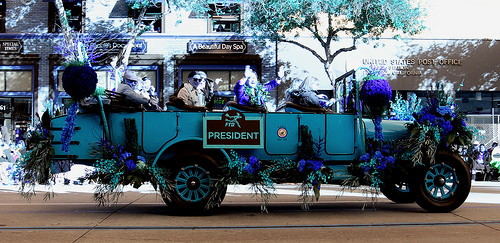

In [15]:
img_show

In [16]:
X,y=[],[]

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img_matrix = cv2.imread(str(image))
        img_resized = cv2.resize(img_matrix,(180,180))
        X.append(img_resized)
        y.append(flowers_images_labels[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
model = keras.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 34s 352ms/step - loss: 1.2528 - accuracy: 0.4748
Epoch 2/10
92/92 [==============================] - 30s 327ms/step - loss: 0.9393 - accuracy: 0.6257
Epoch 3/10
92/92 [==============================] - 30s 326ms/step - loss: 0.7418 - accuracy: 0.7204
Epoch 4/10
92/92 [==============================] - 28s 303ms/step - loss: 0.5562 - accuracy: 0.7864
Epoch 5/10
92/92 [==============================] - 28s 305ms/step - loss: 0.3423 - accuracy: 0.8781
Epoch 6/10
92/92 [==============================] - 28s 306ms/step - loss: 0.1907 - accuracy: 0.9390
Epoch 7/10
92/92 [==============================] - 27s 293ms/step - loss: 0.1126 - accuracy: 0.9676
Epoch 8/10
92/92 [==============================] - 28s 305ms/step - loss: 0.0572 - accuracy: 0.9857
Epoch 9/10
92/92 [==============================] - 28s 301ms/step - loss: 0.0253 - accuracy: 0.9942
Epoch 10/10
92/92 [==============================] - 27s 298ms/step - loss: 0.0189 - accura

In [21]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 2s 69ms/step - loss: 1.5819 - accuracy: 0.6730


[1.5818687677383423, 0.6730245351791382]

In [22]:
predictions = model.predict(X_test_scaled)
predictions

23/23 [==============================] - 2s 81ms/step


array([[ -0.16493957,   1.2934036 ,   5.100714  ,  -2.7648637 ,
         -0.79351467],
       [ -3.8278992 ,  26.47369   ,  -8.982315  , -10.865627  ,
         -2.8461134 ],
       [  5.8276553 ,  -1.1023427 ,  -4.515012  ,  -3.1991446 ,
          8.823953  ],
       ...,
       [ -4.5089655 ,   5.836693  ,   7.943356  ,  -5.3274403 ,
         -0.813033  ],
       [-11.9029455 ,  14.006088  ,   2.005128  ,  -3.6383233 ,
         -3.424753  ],
       [  2.7782393 ,   9.063366  ,  -3.1859293 ,  -3.3962662 ,
         -1.060271  ]], dtype=float32)

In [23]:
# score = tf.nn.softmax(predictions[20])

In [24]:
np.argmax(predictions[6])

4

In [25]:
y_test[6]

4

In [34]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
    
])

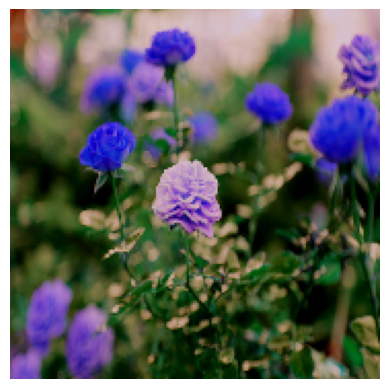

In [28]:
plt.axis('off')
plt.imshow(X[1])

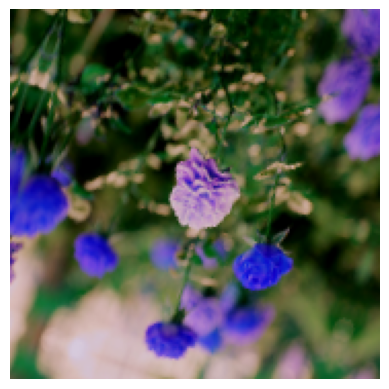

In [33]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype('uint8'))

In [35]:
model = keras.Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 34s 338ms/step - loss: 1.2988 - accuracy: 0.4469
Epoch 2/10
92/92 [==============================] - 33s 362ms/step - loss: 1.0705 - accuracy: 0.5838
Epoch 3/10
92/92 [==============================] - 38s 416ms/step - loss: 0.9390 - accuracy: 0.6465
Epoch 4/10
92/92 [==============================] - 33s 353ms/step - loss: 0.8452 - accuracy: 0.6768
Epoch 5/10
92/92 [==============================] - 32s 349ms/step - loss: 0.8158 - accuracy: 0.6853
Epoch 6/10
92/92 [==============================] - 32s 350ms/step - loss: 0.7563 - accuracy: 0.7057
Epoch 7/10
92/92 [==============================] - 31s 336ms/step - loss: 0.7418 - accuracy: 0.7115
Epoch 8/10
92/92 [==============================] - 31s 337ms/step - loss: 0.6732 - accuracy: 0.7503
Epoch 9/10
92/92 [==============================] - 31s 335ms/step - loss: 0.6438 - accuracy: 0.7452
Epoch 10/10
92/92 [==============================] - 31s 339ms/step - loss: 0.6190 - accura

In [36]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 2s 86ms/step - loss: 0.7353 - accuracy: 0.7330


[0.7353212237358093, 0.7329699993133545]